# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'1.9.1'

### 초기화 되지 않은 행렬 

In [3]:
x = torch.empty(4, 2)
print(x)

tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.8473e-44],
        [3.3828e+21, 2.0798e+20]])


### 무작위로 초기화된 행렬

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.7388, 0.5230],
        [0.4597, 0.4458],
        [0.2232, 0.8040],
        [0.1677, 0.4414]])


### dtype이 long, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [6]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [7]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype=torch.float) # x라는 shape을 그대로 가져와서
print(x)

tensor([[-1.4862, -1.3421, -1.1774,  0.6146],
        [-0.6974, -0.8834,  1.4828,  0.1746]])


### 텐서의 크기

In [9]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [10]:
print(x)

tensor([[-1.4862, -1.3421, -1.1774,  0.6146],
        [-0.6974, -0.8834,  1.4828,  0.1746]])


In [13]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.4856, 0.9806, 0.9667, 0.9494],
        [0.5282, 0.3311, 0.4714, 0.3294]])
tensor([[-1.0006, -0.3615, -0.2107,  1.5640],
        [-0.1692, -0.5522,  1.9543,  0.5040]])


### 덧셈2

In [14]:
print(torch.add(x, y))

tensor([[-1.0006, -0.3615, -0.2107,  1.5640],
        [-0.1692, -0.5522,  1.9543,  0.5040]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [16]:
result = torch.empty(2, 4)
torch.add(x, y, out=result) # 결과값을 result로 뺄 수 있다.
print(result)

tensor([[-1.0006, -0.3615, -0.2107,  1.5640],
        [-0.1692, -0.5522,  1.9543,  0.5040]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [17]:
print(x)
print(y)
y.add_(x) # y+=x
print(y) 

tensor([[-1.4862, -1.3421, -1.1774,  0.6146],
        [-0.6974, -0.8834,  1.4828,  0.1746]])
tensor([[0.4856, 0.9806, 0.9667, 0.9494],
        [0.5282, 0.3311, 0.4714, 0.3294]])
tensor([[-1.0006, -0.3615, -0.2107,  1.5640],
        [-0.1692, -0.5522,  1.9543,  0.5040]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [18]:
x = torch.Tensor(
    [[1, 3],
    [5,7]])
y = torch.Tensor(
    [[2, 4],
    [6,8]])

print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [19]:
x = torch.Tensor(
    [[1, 3],
    [5,7]])
y = torch.Tensor(
    [[2, 4],
    [6,8]])

print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [20]:
x = torch.Tensor(
    [[1, 3],
    [5,7]])
y = torch.Tensor(
    [[2, 4],
    [6,8]])

print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [21]:
x = torch.Tensor(
    [[1, 3],
    [5,7]])
y = torch.Tensor(
    [[2, 4],
    [6,8]])

print(torch.mm(x, y)) #matrix muliply = 행렬 곱

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [22]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [23]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [27]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x)
print(y) # 1차원 형태
print(z) # -1은 자동으로 계산

print(x.size())
print(y.size())
print(z.size())

tensor([[-0.6969, -1.6245,  0.3492,  1.1271,  0.3968],
        [-0.3692,  0.6942,  1.7492,  0.5376, -1.6478],
        [-0.1043, -0.3768, -0.5384,  0.3515, -0.7586],
        [-1.4581,  0.7731,  2.3177,  1.2412, -0.1327]])
tensor([-0.6969, -1.6245,  0.3492,  1.1271,  0.3968, -0.3692,  0.6942,  1.7492,
         0.5376, -1.6478, -0.1043, -0.3768, -0.5384,  0.3515, -0.7586, -1.4581,
         0.7731,  2.3177,  1.2412, -0.1327])
tensor([[-0.6969, -1.6245,  0.3492,  1.1271],
        [ 0.3968, -0.3692,  0.6942,  1.7492],
        [ 0.5376, -1.6478, -0.1043, -0.3768],
        [-0.5384,  0.3515, -0.7586, -1.4581],
        [ 0.7731,  2.3177,  1.2412, -0.1327]])
torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [28]:
x = torch.randn(1)
print(x)
print(x.item()) # item : 실제 안에 존재하는 값 
print(x.dtype)

tensor([-0.6066])
-0.6065935492515564
torch.float32


- 스칼라값 하나만 존재해야함

In [29]:
# x = torch.randn(2)
# print(x)
# print(x.item()) # value error가 뜬다.
# print(x.dtype)

tensor([-0.3643,  0.2732])


ValueError: only one element tensors can be converted to Python scalars

### squeeze 
- 차원을 축소(제거)

In [30]:
tensor = torch.rand(1, 3, 3)
tensor.shape

torch.Size([1, 3, 3])

In [32]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.4969, 0.8329, 0.4914],
        [0.8732, 0.2870, 0.2386],
        [0.8530, 0.9249, 0.8019]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [33]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.0750, 0.5935, 0.7569],
         [0.4388, 0.5325, 0.5615],
         [0.0501, 0.2786, 0.4675]]])
torch.Size([1, 3, 3])


In [34]:
t = tensor.unsqueeze(dim=0) # 차원이 오히려 증가

print(t)
print(t.shape)

tensor([[[[0.0750, 0.5935, 0.7569],
          [0.4388, 0.5325, 0.5615],
          [0.0501, 0.2786, 0.4675]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [35]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z])) # stack = 쌓는다


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [38]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print('a : ', a)
print('b : ', b)
print(c)
print(c.size())

a :  tensor([[[[-1.1836,  0.0092,  0.7193],
          [ 1.1564,  0.1212, -0.3557],
          [ 1.2340,  1.6694,  0.8006]]]])
b :  tensor([[[[ 2.0300,  0.9320, -0.0976],
          [ 1.9815,  0.7354, -0.8266],
          [-0.1027,  1.2076,  0.0698]]]])
tensor([[[[-1.1836,  0.0092,  0.7193],
          [ 1.1564,  0.1212, -0.3557],
          [ 1.2340,  1.6694,  0.8006]]],


        [[[ 2.0300,  0.9320, -0.0976],
          [ 1.9815,  0.7354, -0.8266],
          [-0.1027,  1.2076,  0.0698]]]])
torch.Size([2, 1, 3, 3])


In [40]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=1) # 차원을 지정해준다. 1단위로 
# 내가 cat하고자 하는 dim 지정

print('a : ', a)
print('b : ', b)
print(c)
print(c.size())

a :  tensor([[[ 0.7126,  0.5637,  1.4222],
         [-0.5656, -0.7211,  0.3971],
         [-0.5972,  0.0381, -2.2858]]])
b :  tensor([[[ 0.6700, -0.8062,  0.6849],
         [ 0.5044, -0.1445, -0.1194],
         [ 0.0154, -0.6785, -0.6289]]])
tensor([[[ 0.7126,  0.5637,  1.4222],
         [-0.5656, -0.7211,  0.3971],
         [-0.5972,  0.0381, -2.2858],
         [ 0.6700, -0.8062,  0.6849],
         [ 0.5044, -0.1445, -0.1194],
         [ 0.0154, -0.6785, -0.6289]]])
torch.Size([1, 6, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [41]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1) # tensor를 3으로 묶음 dim=1로

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.3538, 0.0405, 0.9346, 0.8562, 0.1822, 0.0013],
        [0.6756, 0.2766, 0.4767, 0.8419, 0.4189, 0.5001],
        [0.0378, 0.1759, 0.4003, 0.5231, 0.2567, 0.3970]])
tensor([[0.3538, 0.0405],
        [0.6756, 0.2766],
        [0.0378, 0.1759]])
tensor([[0.9346, 0.8562],
        [0.4767, 0.8419],
        [0.4003, 0.5231]])
tensor([[0.1822, 0.0013],
        [0.4189, 0.5001],
        [0.2567, 0.3970]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [42]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1) # 3 = 크기 지정

print(tensor)
print(t1)
print(t2)

tensor([[0.4239, 0.5405, 0.1660, 0.1185, 0.1737, 0.4505],
        [0.2128, 0.1640, 0.5203, 0.2921, 0.9682, 0.5209],
        [0.9468, 0.5017, 0.6463, 0.4637, 0.1088, 0.0976]])
tensor([[0.4239, 0.5405, 0.1660],
        [0.2128, 0.1640, 0.5203],
        [0.9468, 0.5017, 0.6463]])
tensor([[0.1185, 0.1737, 0.4505],
        [0.2921, 0.9682, 0.5209],
        [0.4637, 0.1088, 0.0976]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [43]:
a = torch.ones(7) # 하나로 채우는 것 7개
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [44]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [45]:
a.add_(1) # a에 1을 모두 더함
print(a)
print(b) # tensor가 cpu상에 있기 때문에 메모리 공유

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [46]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [47]:
import torch

In [48]:
x = torch.randn(1)
print(x)
print(x.item()) # item = 실제값
print(x.dtype)

tensor([-1.2078])
-1.2078262567520142
torch.float32


In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 만약 gpu환경이 아니면 cpu 선택
y = torch.ones_like(x, device=device) # 직접 gpu상에서 tensor 만들어보겠다
x = x.to(device) # x자체를 gpu환경으로 옮기겠다
z = x + y
print(device)
print(z)
print(z.to('cpu', torch.double))


cuda
tensor([-0.2078], device='cuda:0')
tensor([-0.2078], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [50]:
import torch

In [51]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [52]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [53]:
print(y.grad_fn) # +5 연산에 대해서 backward 할 수 있는 연산이 붙음

In [54]:
z = y * y * 2
out = z.mean()
# MulBackward0 : 곱에 대한 backward가 붙음

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [56]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False 상태

a.requires_grad_(True) # True 상태
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn) # sumbackward가 붙음

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [57]:
out.backward()

In [58]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [59]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000: # norm : 현재값이
    y = y * 2

print(y)

tensor([-1496.9336,   574.8242,  -963.9843], grad_fn=<MulBackward0>)


In [60]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [62]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad(): # ~~ 옵션을 붙인 상태에서
    print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [63]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [64]:
import torch

In [65]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [66]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [73]:
print('a.data: ', a.data)
print('a.grad', a.grad)
print('a.grad_fn', a.grad_fn)

a.data:  tensor([[1., 1.],
        [1., 1.]])
a.grad tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


- $b = a + 2$

In [68]:
b = a +2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [69]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [70]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [71]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [72]:
print('a.data: ', a)
print('a.grad', a.grad)
print('a.grad_fn', a.grad_fn)

a.data:  tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [74]:
print('b.data: ', b.data)
print('b.grad', b.grad)
print('b.grad_fn', b.grad_fn)

b.data:  tensor([[3., 3.],
        [3., 3.]])
b.grad None
b.grad_fn <AddBackward0 object at 0x000002A3F9C95F88>


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


In [75]:
print('c.data: ', c.data)
print('c.grad', c.grad)
print('c.grad_fn', c.grad_fn)

c.data:  tensor([[9., 9.],
        [9., 9.]])
c.grad None
c.grad_fn <PowBackward0 object at 0x000002A3F9CAE6C8>


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


In [76]:
print('out.data: ', out.data)
print('out.grad', out.grad)
print('out.grad_fn', out.grad_fn)

out.data:  tensor(36.)
out.grad None
out.grad_fn <SumBackward0 object at 0x000002A3F9BD8848>


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [77]:
x = torch.ones(3, requires_grad=True)
y = (x**2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [78]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [79]:
print('x.data: ', x.data)
print('x.grad', x.grad)
print('x.grad_fn', x.grad_fn)

x.data:  tensor([1., 1., 1.])
x.grad tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn None


In [80]:
print('y.data: ', y.data)
print('y.grad', y.grad)
print('y.grad_fn', y.grad_fn)

y.data:  tensor([1., 1., 1.])
y.grad None
y.grad_fn <PowBackward0 object at 0x000002A3D3CDBA08>


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


In [81]:
print('z.data: ', z.data)
print('z.grad', z.grad)
print('z.grad_fn', z.grad_fn)

z.data:  tensor([2., 2., 2.])
z.grad None
z.grad_fn <AddBackward0 object at 0x000002A3F9C75748>


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [82]:
import torch 
import torch.nn as nn

- Convolution Layer 예시 (1)


In [85]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding=(4,2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)
print(output)

tensor([[[[ 2.2576e+00,  1.6124e-01, -4.5301e-01,  ..., -1.7705e+00,
            9.7331e-01,  2.2469e-02],
          [ 9.0245e-01,  2.8341e+00, -1.4440e-01,  ..., -9.7495e-01,
           -1.1915e+00,  1.0638e-01],
          [ 7.7335e-01,  2.9824e-01,  1.9133e-02,  ...,  2.9562e-01,
            1.5380e+00, -9.0006e-02],
          ...,
          [-2.3486e-01,  3.5011e+00,  1.2189e+00,  ..., -8.8096e-01,
           -1.2272e+00,  7.6250e-01],
          [-1.2236e-01, -3.0480e-01,  7.8640e-01,  ..., -1.3818e+00,
           -7.8562e-01, -1.5457e-01],
          [ 8.4872e-01, -1.4933e+00, -1.1984e+00,  ..., -7.7623e-02,
           -2.0382e-01,  9.8702e-01]],

         [[ 4.3345e-01,  1.1153e+00, -9.2674e-02,  ...,  9.4741e-01,
            4.5397e-01, -8.8490e-01],
          [-1.7370e-03, -1.4731e+00, -6.8177e-01,  ...,  5.6230e-02,
           -8.3274e-01, -7.4983e-01],
          [ 1.1238e+00, -1.2013e+00,  1.0518e+00,  ...,  2.9532e-01,
            2.1011e+00,  1.9327e-01],
          ...,
     

In [84]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [86]:
import torch 
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [87]:
filters = torch.randn(8, 4, 3, 3)

In [90]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [91]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [94]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [95]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [96]:
trainset = torchvision.datasets.MNIST(
    root='/content/',
    train=True,
    download=True,
    transform=transform)

testset = torchvision.datasets.MNIST(
    root='/content/',
    train=False,
    download=True,
    transform=transform)

100.0%


Extracting /content/MNIST\raw\train-images-idx3-ubyte.gz to /content/MNIST\raw



102.8%


Extracting /content/MNIST\raw\train-labels-idx1-ubyte.gz to /content/MNIST\raw



100.0%


Extracting /content/MNIST\raw\t10k-images-idx3-ubyte.gz to /content/MNIST\raw



112.7%

Extracting /content/MNIST\raw\t10k-labels-idx1-ubyte.gz to /content/MNIST\raw




C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [97]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [98]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [100]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [101]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [102]:
image = torch_image.numpy()
image.shape

(28, 28)

In [103]:
label = labels[0].numpy()
label.shape # 스칼라

()

In [104]:
label

array(6, dtype=int64)

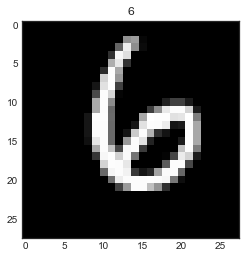

In [107]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [108]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [109]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [110]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [111]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [112]:
weight = weight.detach()

In [113]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

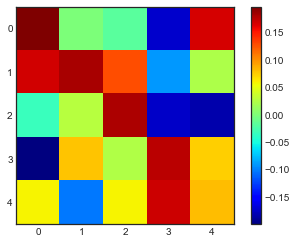

In [114]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [115]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [116]:
input_image = torch.unsqueeze(images[0], dim=0)

In [117]:
output_data = layer(input_image)

In [118]:
output = output_data.data

In [120]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

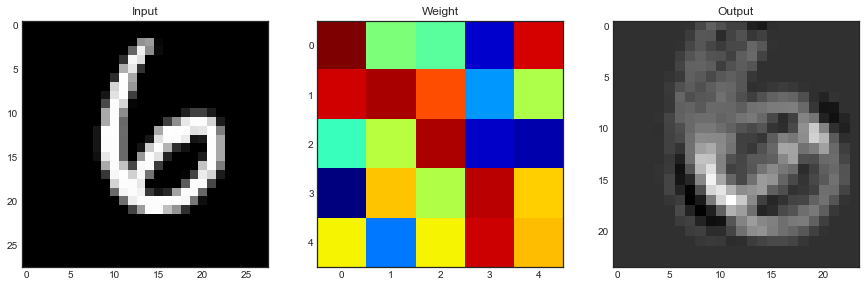

In [124]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'gray')

# layout 하나 통과한 결과

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [125]:
image.shape

(28, 28)

In [126]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [127]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

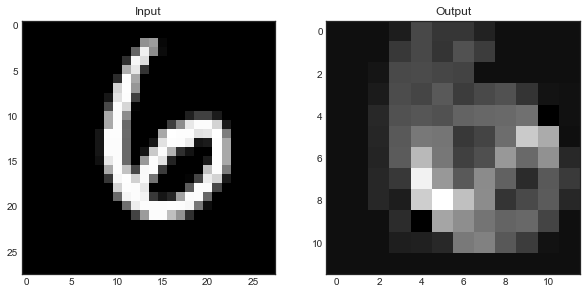

In [128]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[00,0,:,:], 'gray')

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [129]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [130]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [131]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [132]:
lin

tensor([[ 0.5675, -0.5826,  0.2911, -0.2903,  0.2079,  0.0962, -0.9182,  0.0198,
          0.0881,  1.1769]], grad_fn=<AddmmBackward>)

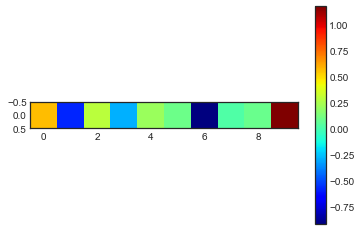

In [133]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [134]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [135]:
softmax

tensor([[0.0806, 0.0675, 0.0715, 0.1629, 0.0728, 0.0619, 0.1814, 0.0482, 0.0925,
         0.1606]])

In [136]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [137]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [139]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

